In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import os

In [3]:
BASE_DIR = Path(os.path.dirname(os.path.abspath('')))

In [4]:
mms_data = pd.read_csv(BASE_DIR/'export'/'csv'/'mms_with_selections.csv', infer_datetime_format=True, parse_dates=[0], index_col=0)
mms_data = mms_data.replace([np.inf, -np.inf], np.nan)
mms_data = mms_data.dropna()

x_train, x_test = np.split(mms_data, [int(len(mms_data)*0.8)])

y_train = x_train.pop('selected')
y_test = x_test.pop('selected')

In [5]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [7]:
clf.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
predicts = clf.predict(x_test)

In [9]:
y_test.values

array([False, False, False, ..., False, False, False])

In [10]:
num_correct = len(y_test)
for prediction, truth in zip(predicts, y_test.values):
    if prediction != truth:
        num_correct -= 1
print(f"Accuracy: {num_correct/len(y_test)}")
print(f"Accuracy: {num_correct}/{len(y_test)}")

Accuracy: 0.9056592131891998
Accuracy: 73391/81036


In [11]:
y_test.values

array([False, False, False, ..., False, False, False])

In [12]:
predicts_df = pd.DataFrame()
predicts_df.insert(0, "time", y_test.index)
predicts_df.insert(1, "prediction", predicts)
predicts_df['group'] = (predicts_df.prediction != predicts_df.prediction.shift()).cumsum()
predicts_df = predicts_df.loc[predicts_df['prediction'] == True]
selections = pd.DataFrame({'BeginDate' : predicts_df.groupby('group').time.first(), 
              'EndDate' : predicts_df.groupby('group').time.last()})
selections = selections.set_index('BeginDate')

In [15]:
test_date = mms_data['2017-02-07' : '2017-02-07 23:59:59']
test_date_selections = selections[test_date.index[0] : test_date.index[len(test_date.index)-1]]

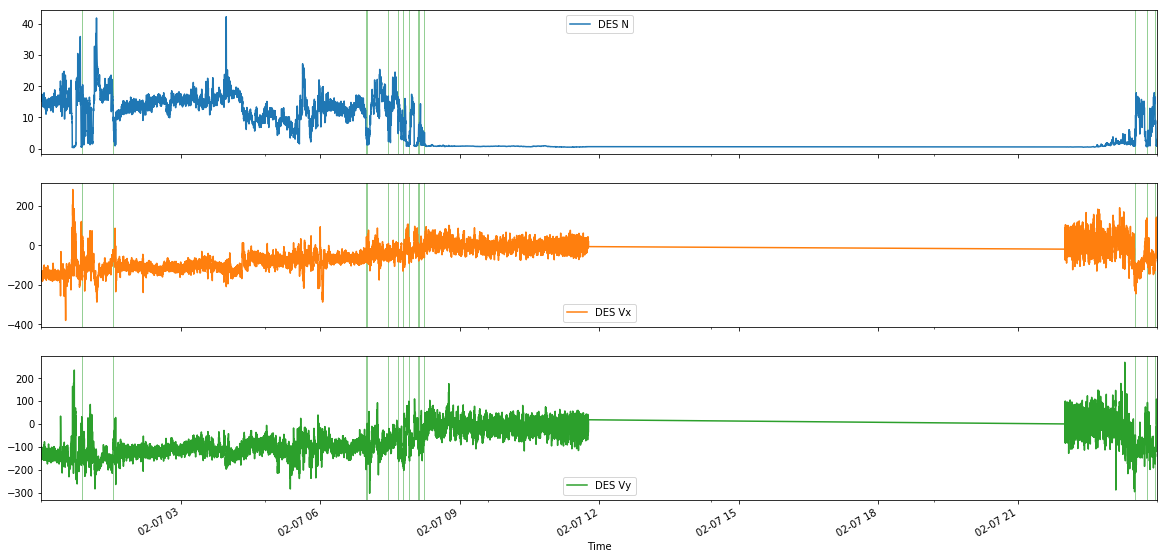

In [16]:
subplots = test_date.iloc[:,0:3].plot(subplots=True, figsize=(20,10))

for start, end in zip(test_date_selections.index, test_date_selections['EndDate']):
    [subplot.axvspan(start, end, facecolor='#2ca02c', alpha=0.5) for subplot in subplots]

In [17]:
actual_selections = pd.read_csv(BASE_DIR/'export'/'csv'/'all_selections.csv', infer_datetime_format=True, parse_dates=[0, 1], index_col=0)
test_date_actual_selections = actual_selections[jan_1_2017.index[0] : jan_1_2017.index[len(jan_1_2017.index)-1]]

subplots = test_date.iloc[:,0:3].plot(subplots=True, figsize=(20,10))


for start, end in zip(test_date_actual_selections.index, test_date_actual_selections['end_t']):
    [subplot.axvspan(start, end, facecolor='#2ca02c', alpha=0.5) for subplot in subplots]

NameError: name 'jan_1_2017' is not defined